<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS**

## **0 Inizializzazione**

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import collections
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [4]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [137]:
grado = dict(G.degree())
gradi = list(grado.values())
nodes = list(G.nodes)
densita = nx.density(G)
cluster = nx.clustering(G)
gr = G.degree()

In [150]:
colors = [gr[n] for n in nodes]
size = [(gr[n]) for n in nodes]
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys
vmin = min(colors)
vmax = max(colors)

In [6]:
pos = nx.spring_layout(G)
posc = nx.circular_layout(G)
posk = nx.kamada_kawai_layout(G)
poss = nx.spiral_layout(G)

In [14]:
def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(15,15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [34]:
def figura(titl, raws, cols, l, h): 
  # l=lunghezza, h=altezza
  fig, axes = plt.subplots(raws,cols)
  fig.set_size_inches(l,h)
  fig.suptitle(titl, fontsize = 20, y = 0.94)
  plt.subplots_adjust(hspace = 0.4)
  return axes

## **1 Analisi Preliminare**

In [7]:
print("NODES: ", len(G.nodes))
print("EDGES: ", len(G.edges))
print("RAGGIO: ", nx.radius(G))
print("DIAMETRO: ", nx.diameter(G))
print("DENSITY: ", nx.density(G))
print("IS_CONNECTED: ", nx.is_connected(G))
print("CLUSTERING: ", nx.average_clustering(G))
print("N. OF CYCLE: ",len(nx.cycle_basis(G)))

NODES:  198
EDGES:  2742
RAGGIO:  4
DIAMETRO:  6
DENSITY:  0.14059375480695277
IS_CONNECTED:  True
CLUSTERING:  0.6174507021536301
N. OF CYCLE:  2545


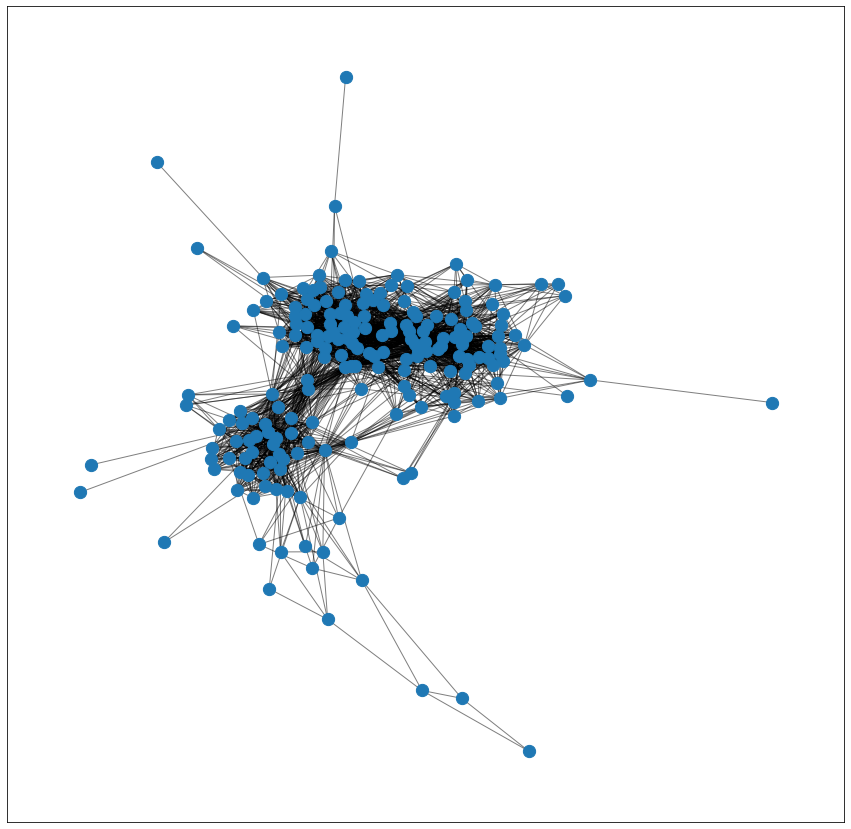

In [151]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_size=150)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

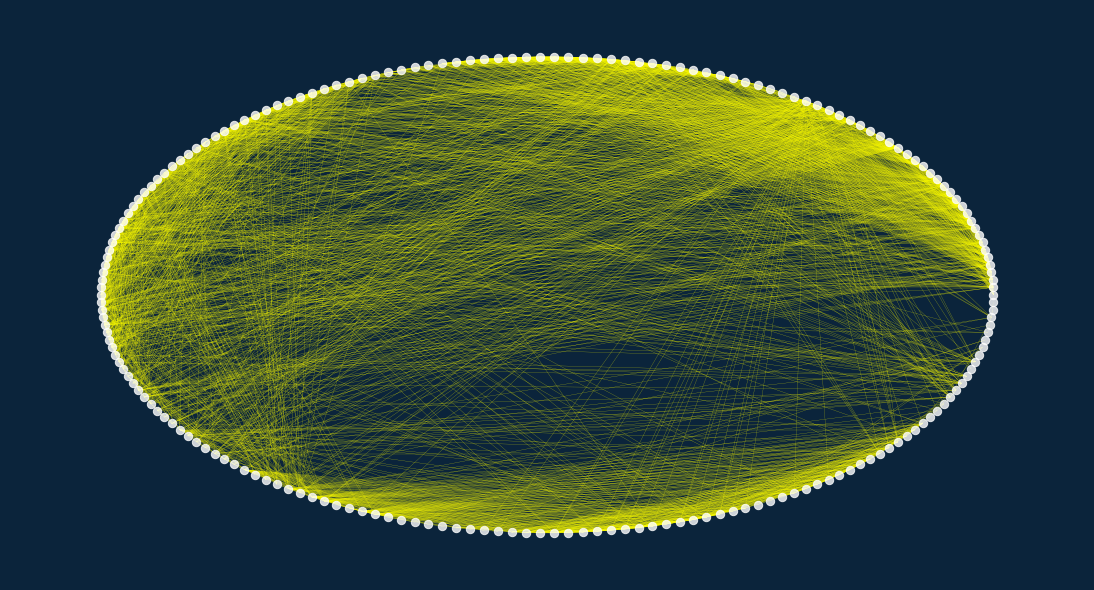

In [142]:
fig = plt.figure(figsize = (15,8))
nx.draw(G,pos=posc,alpha = 0.8, nodelist = nodes, node_color = 'w', 
        node_size = 70, with_labels= False, font_size = 16, 
        width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')
plt.show()

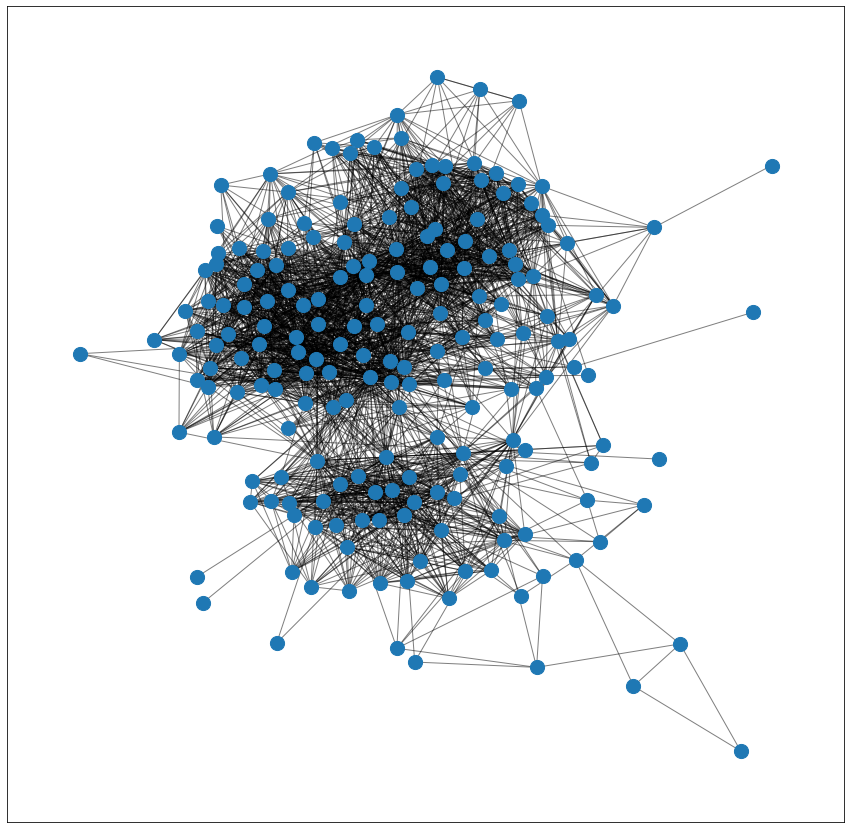

In [10]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posk, node_size=200)
nx.draw_networkx_edges(G, pos=posk, alpha=0.5)
plt.show()

In [198]:
eccentr = nx.eccentricity(G)

In [203]:
#print("Nodi con eccentricità 9: ",[nx.get_node_attributes(graph,'name')[k] for k,v in d.items() if v==9 and graph[k]['Class'] not in ])
for e in range(1,7):
  cardinality = len([k for k,v in eccentr.items() if v==e])
  print("N. nodi eccentricità ", e, ":", cardinality)

N. nodi eccentricità  1 : 0
N. nodi eccentricità  2 : 0
N. nodi eccentricità  3 : 0
N. nodi eccentricità  4 : 56
N. nodi eccentricità  5 : 133
N. nodi eccentricità  6 : 9


### **1.1 Analisi del Grado**

In [11]:
print('Standard deviation: {}'.format(np.std(gradi)))
print('Mean: {}'.format(np.mean(gradi)))
print('Median: {}'.format(np.median(gradi)))
print('Min: {}'.format(np.min(gradi)))
print('Max: {}'.format(np.max(gradi)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 17.41035019313416
Mean: 27.696969696969695
Median: 25.0
Min: 1
Max: 100
Assortativity coefficient: 0.020237399275047713


,nodes,grado
30,67,100
21,7,96
12,20,75
15,23,74
101,90,62


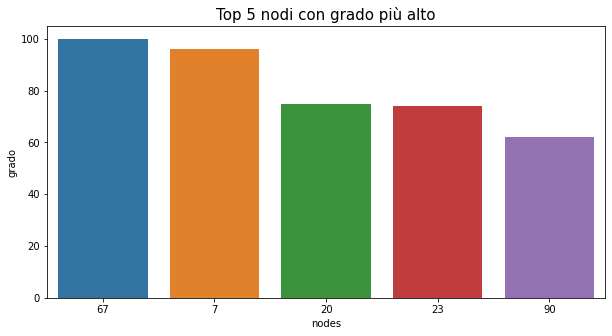

In [154]:
deg4top = pd.DataFrame(grado.items(), columns=['nodes', 'grado'])

plt.figure(figsize=(10,5))
i,j=0,0
for val in deg4top.columns[1:2]:
  top_deg = deg4top.sort_values([val], ascending=False)[0:5]
  sns.barplot(top_deg["nodes"], top_deg[val])
plt.title('Top 5 nodi con grado più alto', fontsize = 15)
top_deg

Text(0.5, 0, 'Degree')

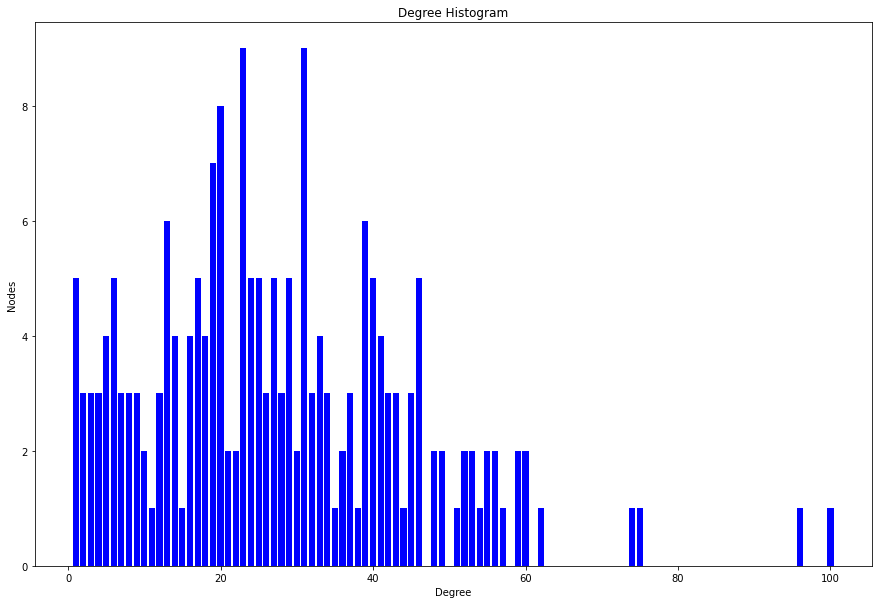

In [155]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
degg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(15,10))

plt.bar(degg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Nodes")
plt.xlabel("Degree")

## **2 Centralità**

### **2.1 Degree Centrality**

Quanti neighbors ha ciascun nodo?

In [51]:
degree = nx.degree_centrality(G)

In [52]:
ranks = [(k, v) for k, v in sorted(degree.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.5076142131979695),
 ('7', 0.4873096446700507),
 ('20', 0.38071065989847713),
 ('23', 0.3756345177664974),
 ('90', 0.3147208121827411)]

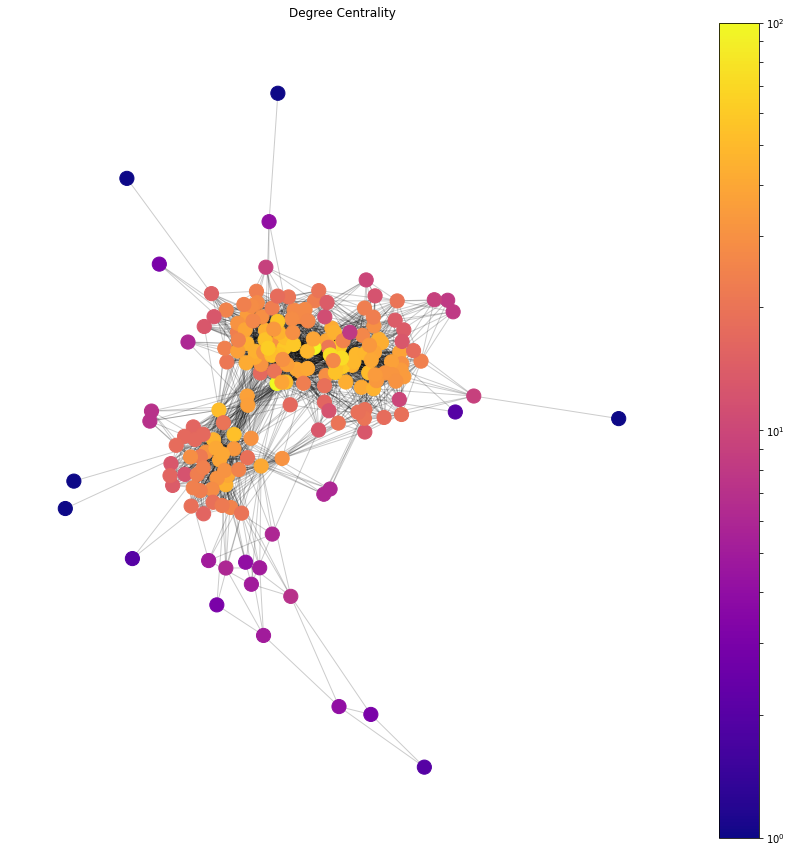

In [205]:
draw(G, pos, grado, 'Degree Centrality')

### **2.2 Closeness Centrality**


**Farness**: media della lunghezza dei percorsi più brevi verso tutti gli altri nodi

**Closeness**: inversa della Farness (normalizzata per numero di nodi)

In [54]:
closeness = nx.closeness_centrality(G)

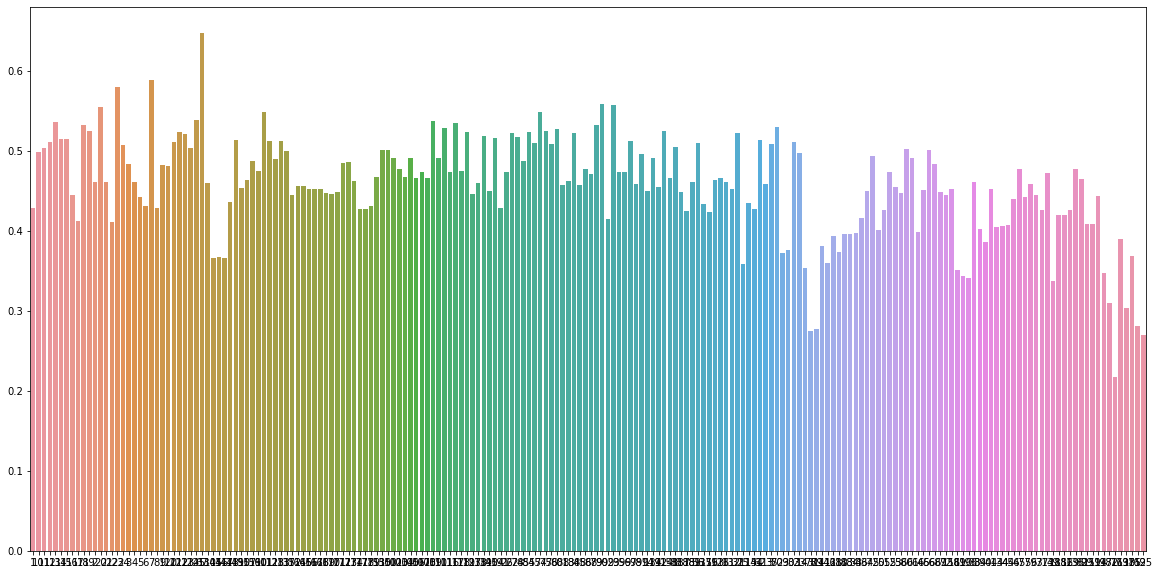

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x=list(closeness.keys()), y=list(closeness.values()))

In [56]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.6480263157894737),
 ('7', 0.5898203592814372),
 ('23', 0.5811209439528023),
 ('90', 0.5596590909090909),
 ('93', 0.5580736543909348)]

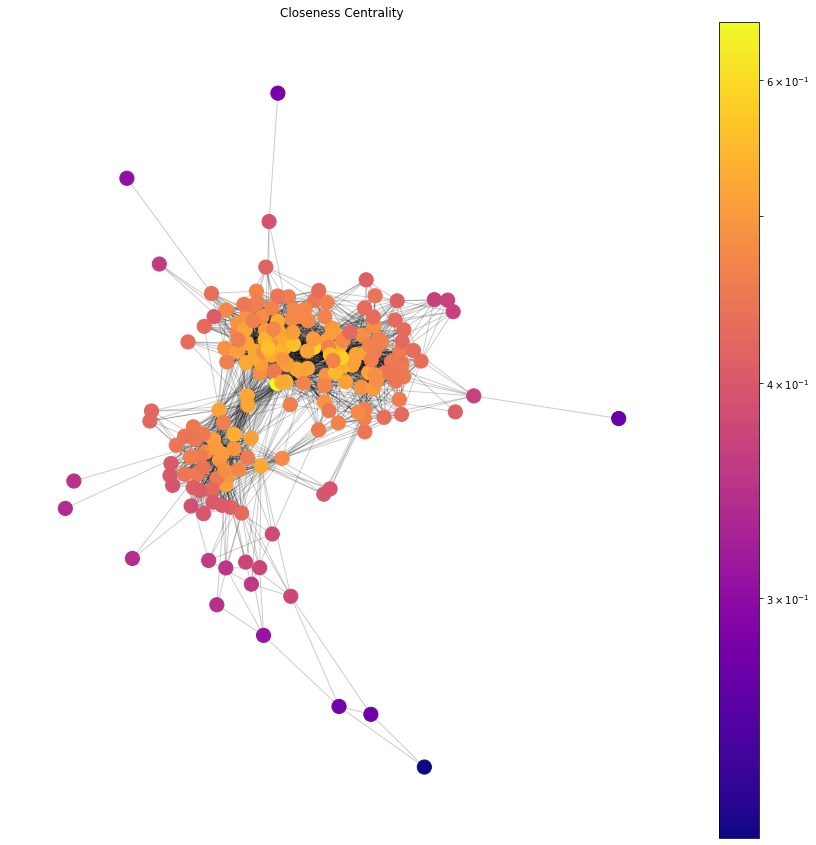

In [57]:
draw(G, pos, closeness, 'Closeness Centrality')

### **2.3 Betweenness Centrality**

Numero di cammini minimi che attraversano un nodo.

**Presupposto**: i vertici importanti sono ponti sui quali fluiscono le informazioni

**In pratica**: se le informazioni si diffondono per cammini minimi, nodi importanti si trovano su molti cammini minimi

In [58]:
betweenness = nx.betweenness_centrality(G)

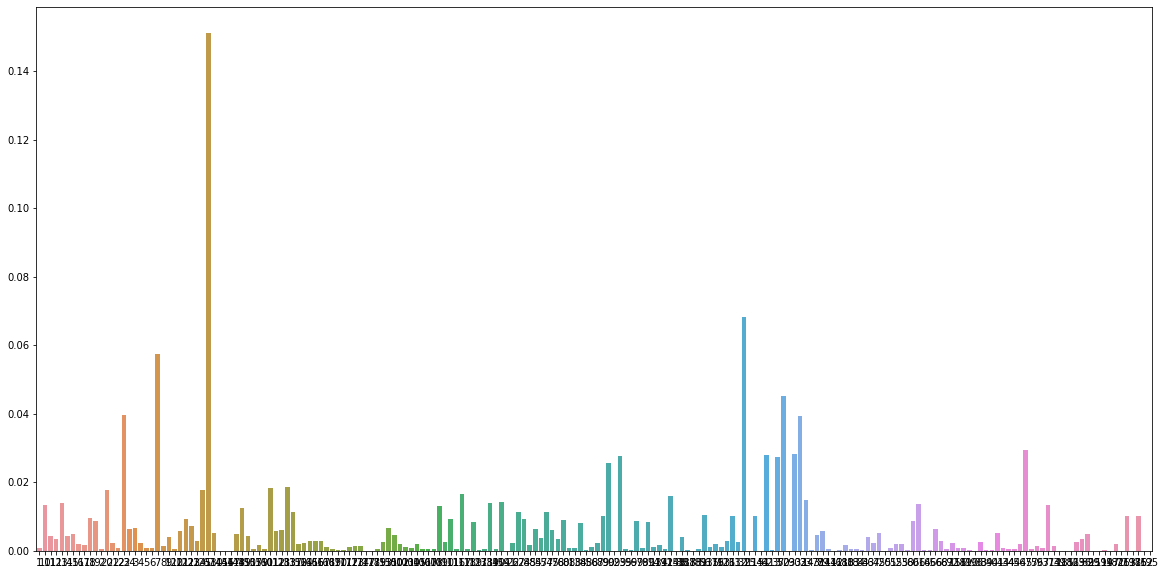

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x=list(betweenness.keys()), y=list(betweenness.values()))

In [60]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.15105615373941586),
 ('31', 0.06829206963519824),
 ('7', 0.057538917986120146),
 ('70', 0.04517867657801444),
 ('23', 0.03960002124911093)]

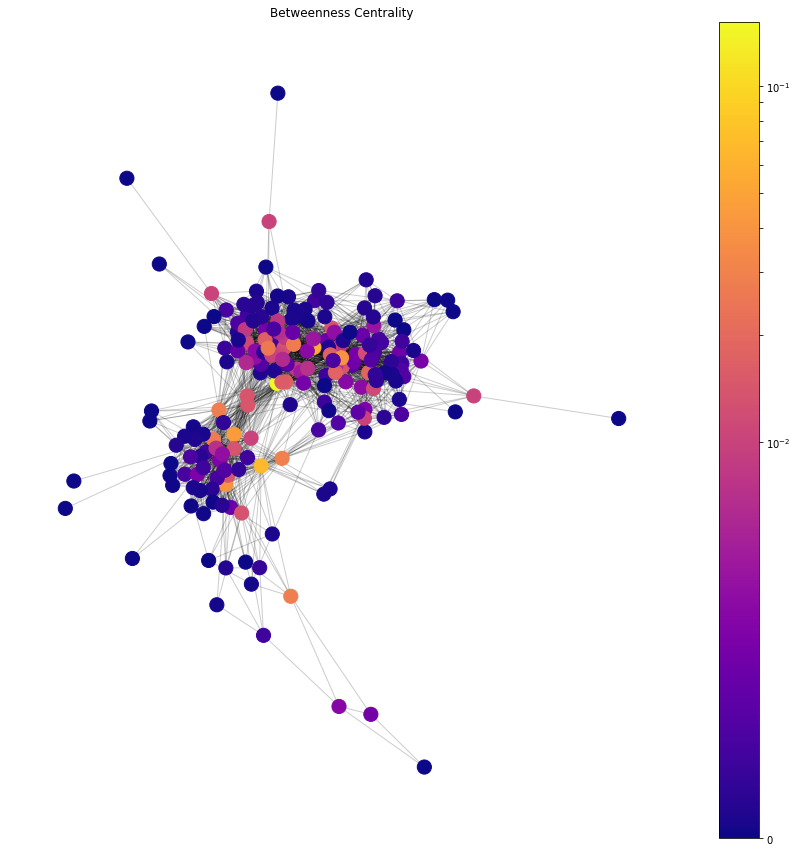

In [61]:
draw(G, pos, betweenness, 'Betweenness Centrality')

### **2.4 Harmonic Centrality**

Media armonica delle distanze geodetiche (percorsi abbreviati) da un dato nodo a tutti gli altri.

In [62]:
harmonic = nx.harmonic_centrality(G)

In [63]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 147.00000000000003),
 ('7', 140.95000000000002),
 ('23', 132.41666666666666),
 ('20', 130.36666666666656),
 ('90', 126.33333333333327)]

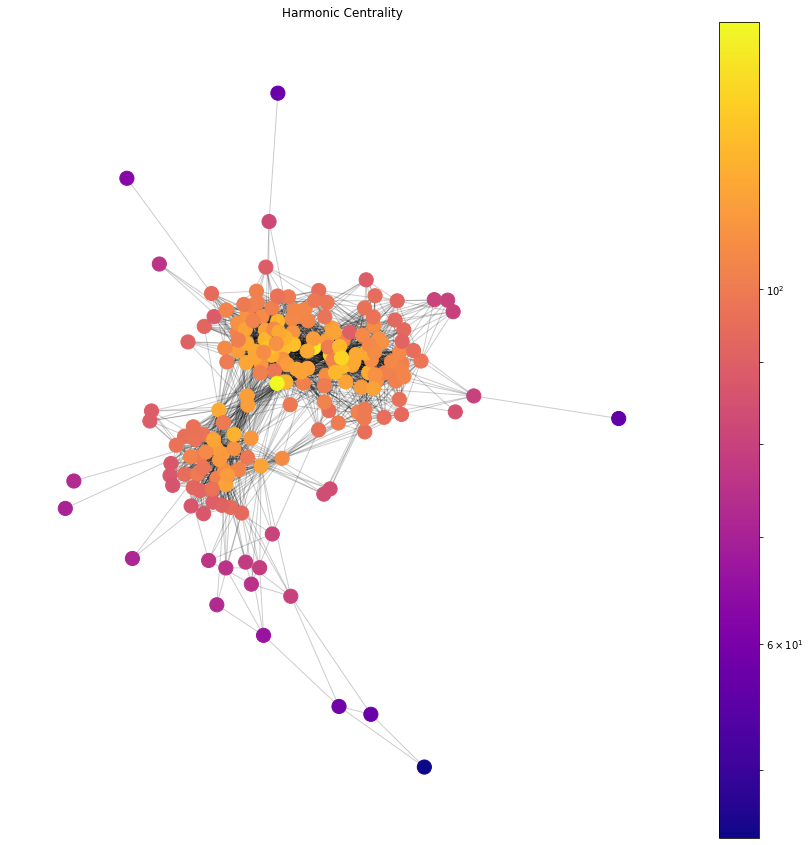

In [64]:
draw(G, pos, harmonic, 'Harmonic Centrality')

### **2.5 Eigenvector Centrality**

Una coppia di autovettore (x) e autovalore (λ) è definita dalla relazione: 
*Ax = λx*
- x è un vettore di dimensione N che può essere interpretato come i punteggi dei nodi
- Ax produce un nuovo vettore della stessa dimensione che corrisponde per ogni nodo alla somma dei punteggi ricevuti dai suoi vicini (neighbors)
- l'uguaglianza implica che i nuovi punteggi siano proporzionali ai precedenti

In [65]:
eigen = nx.eigenvector_centrality(G)

In [66]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('7', 0.210407602557835),
 ('20', 0.18434572268355884),
 ('67', 0.1777740535663636),
 ('23', 0.16687432474667022),
 ('18', 0.15531651037408598)]

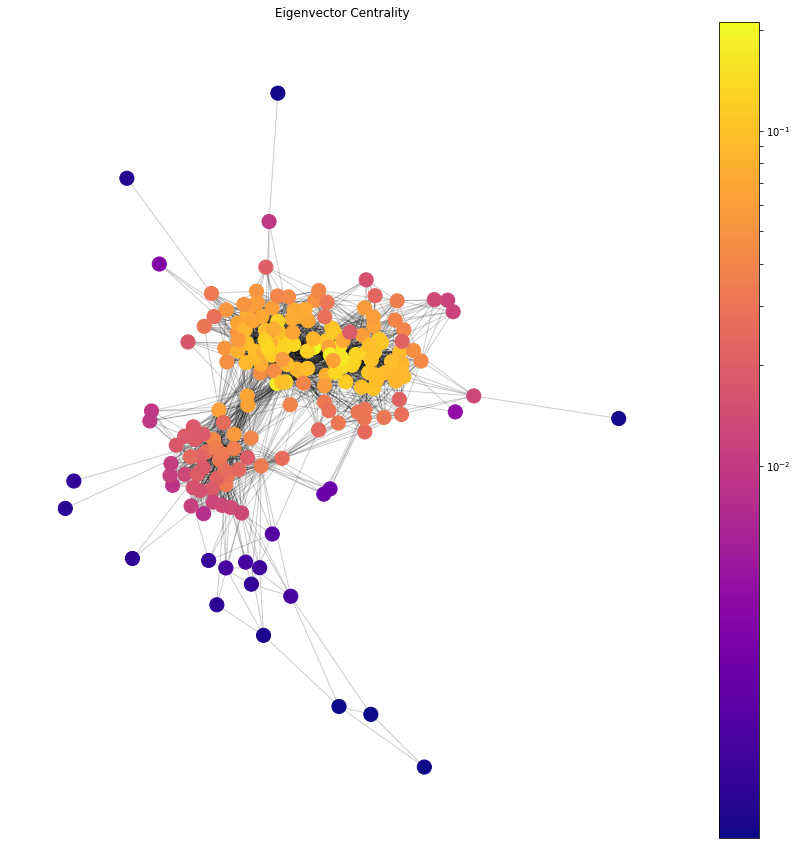

In [67]:
draw(G, pos, eigen, 'Eigenvector Centrality')

### **2.6 Top 5 Centralità**

In questa sezione viene tracciato un istogramma per ogni tipo di centralità, che rappresenta la distribuzione del punteggio sui vari nodi del grafo

In [68]:
from functools import reduce

deg = pd.DataFrame(degree.items(), columns=['nodes', 'Degree Centrality'])
clo = pd.DataFrame(closeness.items(), columns=['nodes', 'Closeness Centrality'])
bet = pd.DataFrame(betweenness.items(), columns=['nodes', 'Betweenness Centrality'])
eig = pd.DataFrame(eigen.items(), columns=['nodes', 'Eigenvector Centrality'])
har = pd.DataFrame(harmonic.items(), columns=['nodes', 'Harmonic Centrality'])
clu = pd.DataFrame(cluster.items(), columns=['nodes', 'Clustering']) 

dfs = [deg, clo, bet, eig, har, clu]
centr_values = reduce(lambda  left,right: pd.merge(left,right,on=['nodes'], how='inner'), dfs)

In [69]:
centr_values

,nodes,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Harmonic Centrality,Clustering
0,1,0.116751,0.429194,0.000851,0.058462,96.700000,0.656126
1,10,0.213198,0.498734,0.013289,0.102054,112.866667,0.483159
2,11,0.203046,0.503836,0.004314,0.105163,112.783333,0.512821
3,12,0.233503,0.511688,0.003418,0.126975,115.700000,0.640580
4,13,0.304569,0.536785,0.014079,0.148182,123.366667,0.464972
...,...,...,...,...,...,...,...
193,163,0.020305,0.390873,0.010152,0.009803,82.283333,0.500000
194,198,0.005076,0.303544,0.000000,0.000829,62.750000,0.000000
195,175,0.045685,0.368914,0.010152,0.012837,79.950000,0.777778
196,162,0.005076,0.281429,0.000000,0.000245,57.650000,0.000000


In [70]:
def centrality(centr_values, axes):
  i,j = 0,0
  for val in centr_values.columns[1:-1]:
    # Ordina centr_values in maniera decrescente e seleziona i top 5
    data = centr_values.sort_values([val], ascending=False)[0:5]
    # Traccia un grafico a barre dei 5 nodi col miglior punteggio
    sns.barplot(data["nodes"], data[val], ax = axes[j][i])
    axes[j][i].set_title(val, pad=20)
    i,j = (0,j+1) if i == 1 else (i+1,j)

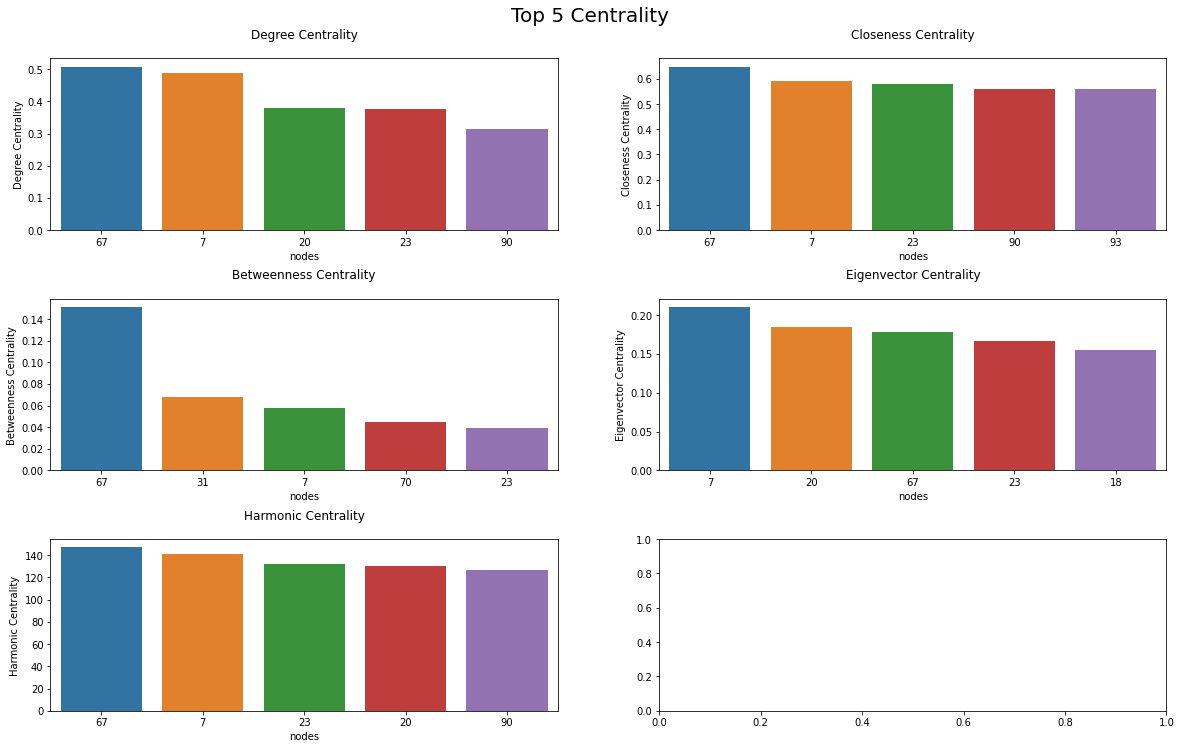

In [71]:
axes = figura("Top 5 Centrality",3,2,20,12)
centrality(centr_values, axes)

### **2.7 Distribuzione delle centralità**

In questa sezione viene tracciato un istogramma per ogni tipo di centralità, che rappresenta la distribuzione del punteggio sui vari nodi del grafo

In [72]:
def centrality_distrib(centr_values, axes):
  i,j = 0,0
  for val in centr_values.columns[1:-1]:
    # Traccia l'istogramma che rappresenta la distribuzione
    sns.distplot(centr_values[val], ax = axes[j][i])
    axes[j][i].set_title(val, pad=20)
    i,j = (0,j+1) if i == 1 else (i+1,j)

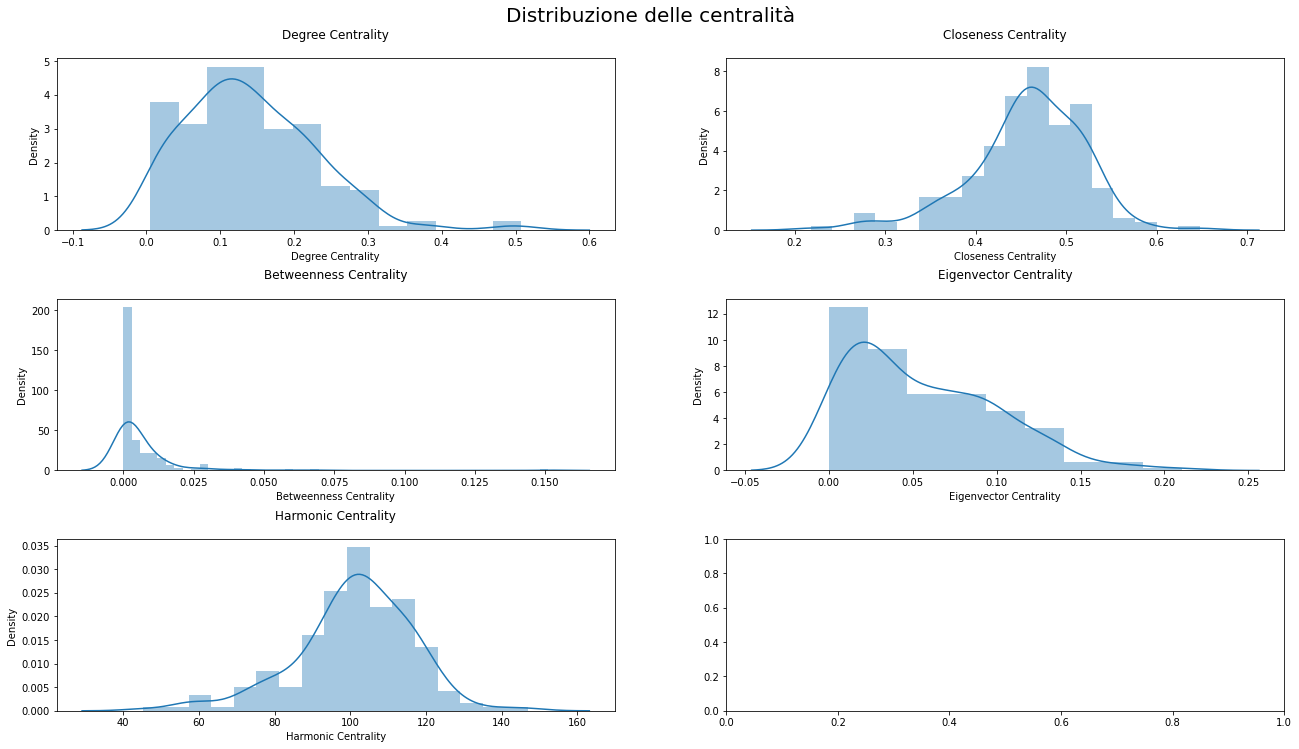

In [73]:
axes = figura("Distribuzione delle centralità",3,2,22,12)
centrality_distrib(centr_values, axes)

### **2.8 Grafo delle centralità**

In questa sezione per ogni tipo di centralità viene tracciato il grafo, associando ai vari nodi un colore proporzionale al punteggio considerato.

In [74]:
def centrality_graph(G, centr_values, axes, labels=None):
  i,j = 0,0
  pos = nx.circular_layout(G) if labels else nx.spring_layout(G)
  for val in centr_values.columns[1:-1]:
    data = nx.draw_networkx_nodes(G, pos, node_color=centr_values[val], ax=axes[j][i])
    nx.draw_networkx_edges(G, pos, ax=axes[j][i])
    data.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    axes[j][i].set_title("Heatmap "+ val, pad=20)
    plt.colorbar(data, ax=axes[j][i])
    i,j = (0,j+1) if i == 1 else (i+1,j)

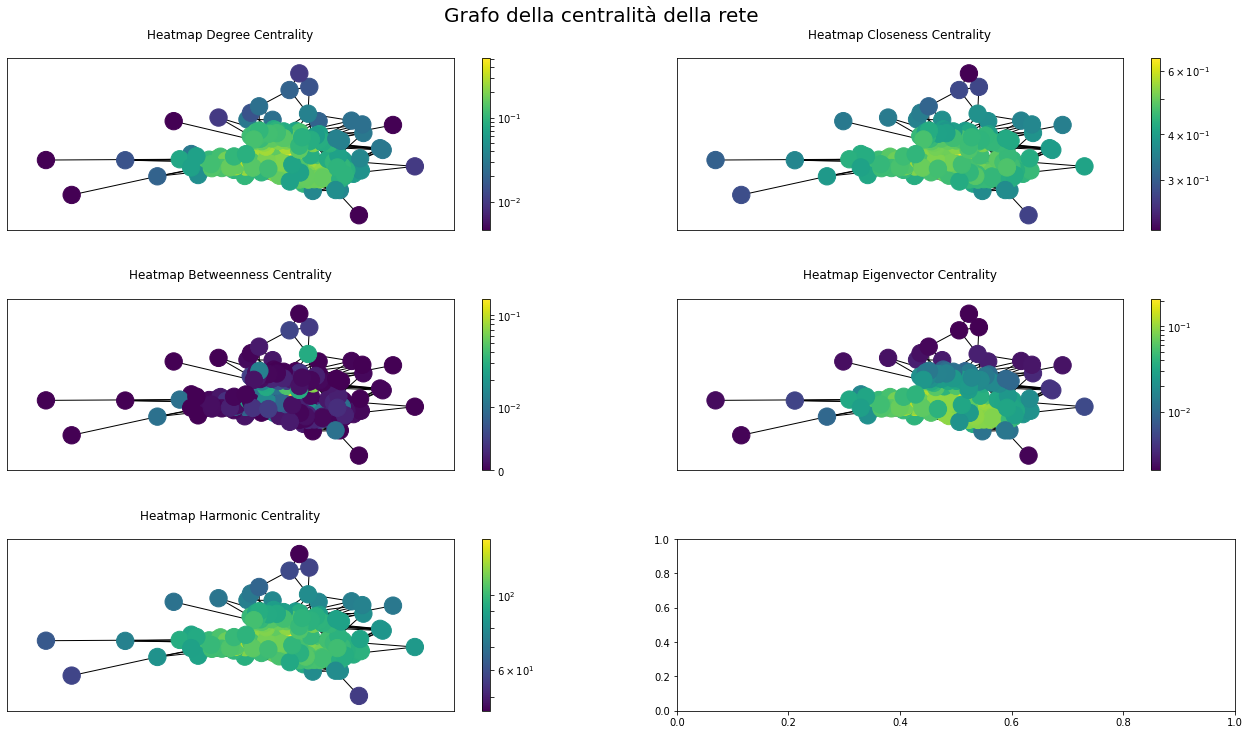

In [75]:
axes = figura("Grafo della centralità della rete",3,2,22,12)
centrality_graph(G, centr_values, axes)

### **2.9 Longest Shortest Path**

In [158]:
short = nx.shortest_path_length(G)

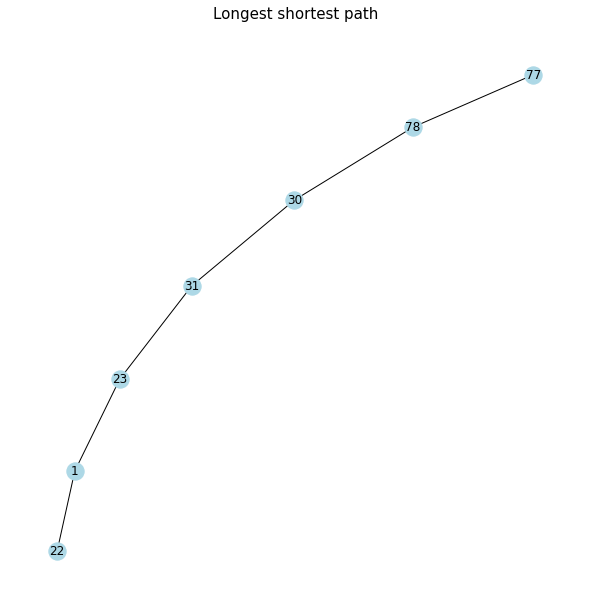

In [188]:
length = dict(nx.all_pairs_shortest_path_length(G))
max, s, t = 0, 0, 0
for source in G.nodes():
  for target in G.nodes():
    if length[source][target] > max:
      max = length[source][target]
      s = source
      t = target
path = G.subgraph(nx.shortest_path(G, s, t))

plt.figure(figsize=(8,8))
nx.draw(path, with_labels=True, node_color='lightblue')
plt.title("Longest shortest path", fontsize = 15)
plt.show()
